In [10]:
import pandas as pd
import numpy as np
import json
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
train = pd.read_csv("~/Downloads/kaggle_google/train.csv")
train.head(3)

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386


In [3]:
# Converting into 4 seperate Dataframes for device,geonetwork,totals and traffic source

#Device List
devicelist = train['device'].apply(json.loads)
dev_frame = pd.DataFrame(devicelist.tolist())

#GeoNetwork List
geolist = train['geoNetwork'].apply(json.loads)
geo_frame = pd.DataFrame(geolist.tolist())

#Totals List
totalslist = train['totals'].apply(json.loads)
tot_frame = pd.DataFrame(totalslist.tolist())

#Traffic List
trafficlist = train['trafficSource'].apply(json.loads)
traf_frame = pd.DataFrame(trafficlist)

In [4]:
combined_df = pd.concat([train[['fullVisitorId','channelGrouping','date','socialEngagementType','sessionId','visitId']],dev_frame,traf_frame,tot_frame,geo_frame],axis=1,)
combined_df.head(3)

,fullVisitorId,channelGrouping,date,socialEngagementType,sessionId,visitId,browser,browserSize,browserVersion,deviceCategory,...,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,1131660440785968503,Organic Search,20160902,Not Socially Engaged,1131660440785968503_1472830385,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,...,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia
1,377306020877927890,Organic Search,20160902,Not Socially Engaged,377306020877927890_1472880147,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,...,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia
2,3895546263509774583,Organic Search,20160902,Not Socially Engaged,3895546263509774583_1472865386,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,...,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe


In [5]:
combined_df.columns

Index(['fullVisitorId', 'channelGrouping', 'date', 'socialEngagementType',
       'sessionId', 'visitId', 'browser', 'browserSize', 'browserVersion',
       'deviceCategory', 'flashVersion', 'isMobile', 'language',
       'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName',
       'mobileDeviceModel', 'mobileInputSelector', 'operatingSystem',
       'operatingSystemVersion', 'screenColors', 'screenResolution',
       'trafficSource', 'bounces', 'hits', 'newVisits', 'pageviews',
       'transactionRevenue', 'visits', 'city', 'cityId', 'continent',
       'country', 'latitude', 'longitude', 'metro', 'networkDomain',
       'networkLocation', 'region', 'subContinent'],
      dtype='object')

In [6]:
# We need to aggregate data on a per user basis

combined_df["transactionRevenue"] = combined_df.transactionRevenue.astype('float')
gdf = combined_df.groupby("fullVisitorId")["transactionRevenue"].sum().reset_index()

In [7]:
gdf.head(5)

,fullVisitorId,transactionRevenue
0,5103959234087,0.0
1,10278554503158,0.0
2,20424342248747,0.0
3,27376579751715,0.0
4,33471059618621,0.0


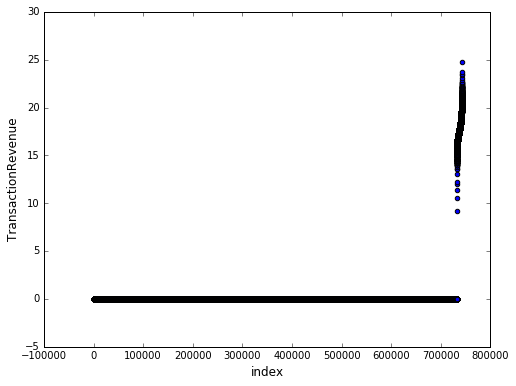

In [12]:
#Making a simple distribution plot for revenue

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()